# Word Frequencies

## Import Functions

In [1]:
import nltk                                  # Python library for NLP
import pandas as pd                          # Library for import data from excel
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

In [2]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import our convenience functions
from utils_ind import process_tweet, build_freqs

[nltk_data] Downloading package stopwords to C:\Users\ROG
[nltk_data]     STRIX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset

In [3]:
df = pd.read_excel("sentiment_sample.xlsx")
df = df.drop(columns=["id"])
df

,text,label
0,yuk sini kita musuhan biar aku teror km :(,-1
1,lu mah sukanga om om :(,-1
2,kannnn :( target a tapi bila dah macam ni dah ...,-1
3,tp klopun msk gw pribadipun blm yakin bisa non...,-1
4,2 personil mejile besok mau pulang tiati ya ka...,-1
...,...,...
195,"simple aja sih. jangan mainin perasaan cewek, ...",1
196,telkomsel: mhmdaliwafa jika log in instagram d...,1
197,telkomsel: lanwsp [3] info lengkap friday movi...,1
198,halobca: rizkyrinjani_ mhn bpk rizky infokan n...,1


In [4]:
# select the lists of positive and negative tweets
all_positive_tweets = df[df['label'] == 1].values[:,0]
all_negative_tweets = df[df['label'] == -1].values[:,0]

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  100


In [5]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

## Dictionary

### Definition

In [6]:
dictionary = {'key1': 1, 'key2': 2}

### Add or Edit

In [7]:
# Add a new entry
dictionary['key3'] = -5

# Overwrite the value of key1
dictionary['key1'] = 0

print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


### Accessing values and lookup keys

In [8]:
# Square bracket lookup when the key exist
print(dictionary['key2'])

2


In [9]:
# This prints a value
if 'key1' in dictionary:
    print("item found: ", dictionary['key1'])
else:
    print('key1 is not defined')

# Same as what you get with get
print("item found: ", dictionary.get('key1', -1))

item found:  0
item found:  0


In [10]:
# This prints a message because the key is not found
if 'key7' in dictionary:
    print(dictionary['key7'])
else:
    print('key does not exist!')

# This prints -1 because the key is not found and we set the default to -1
print(dictionary.get('key7', -1))

key does not exist!
-1


## Word Frequencies

In [11]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 771


In [12]:
print(freqs)

{('juang', 1.0): 1, ('', 1.0): 231, ('yuk', 1.0): 1, ('musuh', 1.0): 1, ('biar', 1.0): 4, ('teror', 1.0): 1, ('km', 1.0): 1, ('shahrezamirza', 1.0): 1, ('selamat', 1.0): 3, ('siang', 1.0): 5, ('mas', 1.0): 7, ('zae', 1.0): 1, ('sila', 1.0): 5, ('info', 1.0): 24, ('detail', 1.0): 2, ('keluh', 1.0): 1, ('nomor', 1.0): 14, ('via', 1.0): 14, ('dm', 1.0): 22, ('litalu', 1.0): 1, ('mah', 1.0): 7, ('sukanga', 1.0): 1, ('om', 1.0): 3, ('telkomsel', 1.0): 64, ('muhammadarviin', 1.0): 1, ('iya', 1.0): 2, ('buka', 1.0): 2, ('krisakannn', 1.0): 1, ('target', 1.0): 1, ('a', 1.0): 2, ('dah', 1.0): 4, ('ni', 1.0): 2, ('lulus', 1.0): 2, ('pon', 1.0): 1, ('fahrie', 1.0): 2, ('0007', 1.0): 2, ('interaksi', 1.0): 13, ('ratutp', 1.0): 1, ('klopun', 1.0): 2, ('msk', 1.0): 1, ('gw', 1.0): 1, ('pribadi', 1.0): 1, ('blm', 1.0): 3, ('nonton', 1.0): 2, ('dpt', 1.0): 4, ('kerja', 1.0): 1, ('soalx', 1.0): 1, ('ya', 1.0): 11, ('udah', 1.0): 7, ('izin', 1.0): 1, ('ortu', 1.0): 1, ('yg', 1.0): 12, ('takutx', 1.0): 1

## Visualize Frequencies

In [13]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['selamat', 'salah', 'sedih', 'kendala', 'marah', 'tenang', 'cantik',
        'dekat', 'telkomsel', 'dm', 'info']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['selamat', 3, 0],
 ['salah', 5, 0],
 ['sedih', 3, 0],
 ['kendala', 10, 0],
 ['marah', 1, 0],
 ['tenang', 1, 0],
 ['cantik', 1, 0],
 ['dekat', 1, 0],
 ['telkomsel', 64, 0],
 ['dm', 22, 0],
 ['info', 24, 0]]

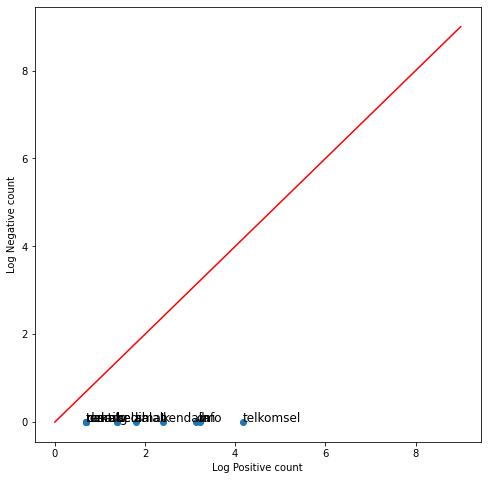

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()